<a href="https://colab.research.google.com/github/BJUNEJA/nomadgene/blob/master/MCMC_MH_dummy_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt


9.933711028519165

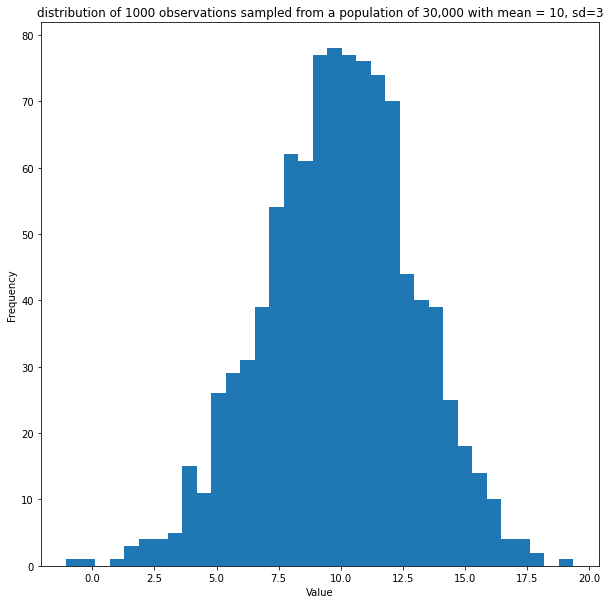

In [49]:
mod1 = lambda t:np.random.normal(10,3,t)
population = mod1(30000)    # generate a population from random normal distribution with mu=10 and sigma =3 
## assume we are only able to observe 1000 individuals from this population 
observation = population[np.random.randint(0,30000,1000)]    ### numpy randint takes arguments <low>, <high>, <size> 

## lets plot our observed population 
fig = plt.figure(figsize=(10,10));
ax = fig.add_subplot(1,1,1)
ax.hist(observation, bins=35,)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("distribution of 1000 observations sampled from a population of 30,000 with mean = 10, sd=3")

mu_obs = observation.mean()
mu_obs


In [0]:
### lets estimate distribution for sigma . ofcourse we can always calculate it using standard formula
## but intent is to rather estimate the distribution for same using MCMC MH. we are trying to estimate distribution for sigma and not 
# trying to compute point value.  We can assume both mu and sigma to be unknown. 

## Identify  proposal distribution or transition model   Q(sig_new/sig_current) = N(mu=sig_current, sigma'=1)
## sigma' only impacts the convergence time of algorithm. it represents the sd of parameter space. 
transition_model = lambda x: [x[0],np.random.normal(x[1],0.5,(1,))]

In [0]:
### Prior P(theta) : could be any prior except that it cannot be negative 
def prior(x): 
  if (x[1]<=0):
    return 0 
  return 1 

In [0]:
def log_likelihood_normal(x, data):
  return np.sum(-np.log(x[1]*np.sqrt(2*np.pi)) -((data - x[0])**2/ (2*x[1]**2)) )

In [0]:
def acceptance(x,x_new):
  if x_new > x:
    return True 
  else:
    accept = np.random.uniform(0,1)
  return(accept < np.exp(x_new - x))


In [0]:
def metropolis_hastings(likelihood_computer, prior, transition_model, param_init, iterations, data, acceptance_rule):
  x= param_init;
  accepted =[];
  rejected =[];
  for i in range(iterations):
    x_new = transition_model(x);
    x_lik = likelihood_computer(x, data);
    x_lik_new = likelihood_computer(x_new,data);
    if(acceptance_rule(x_lik + np.log(prior(x)), x_lik_new + np.log(prior(x_new)))):
      x = x_new;
      accepted.append(x_new);
    else: 
      rejected.append(x_new);
  return np.array(accepted) , np.array(rejected) 



In [0]:
accepted,rejected = metropolis_hastings(log_likelihood_normal, prior, transition_model, [mu_obs, 0.1], 50000, observation, acceptance  )

In [56]:
accepted[-10:,1]
print(accepted.shape)

(8266, 2)


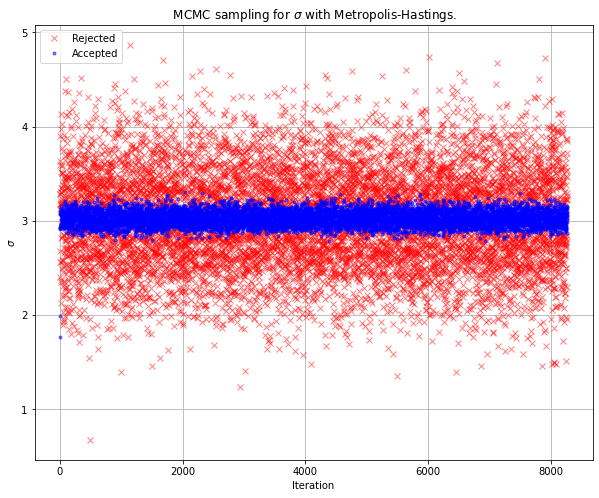

In [57]:
#### Here comes the most important part ######
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
to_show_accepted=-accepted.shape[0]
to_show_rejected =-rejected.shape[0]
ax.plot( rejected[to_show_accepted:,1], 'rx', label='Rejected',alpha=0.5)
ax.plot( accepted[to_show_accepted:,1], 'b.', label='Accepted',alpha=0.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("$\sigma$")
ax.set_title(" MCMC sampling for $\sigma$ with Metropolis-Hastings. ")
ax.grid()
ax.legend()


6199
(6199,)
[3.06774747 3.08183443 2.94728551 ... 3.04734073 3.09250807 2.86862606]


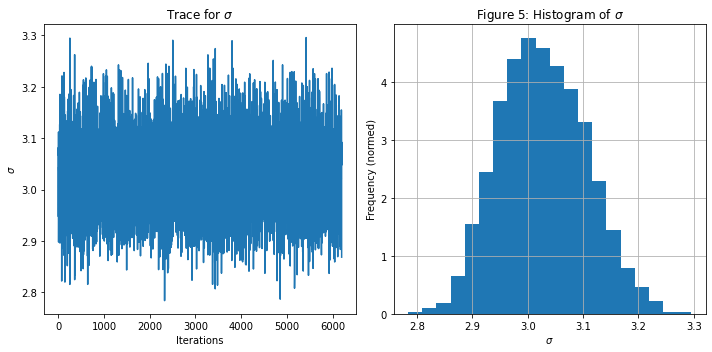

In [123]:
#### drop initial 25% of values as they are burn-in 
## create the trace of remaining 75% of estimates for sigma and its histogram    ### 40 mins spent to fix issue with histogram. 

show = int(-0.75*accepted.shape[0]);
hist_show = int(-0.75*accepted.shape[0]); 
arr = np.array(accepted[hist_show:,1])
print(len(arr))
krr =[]
for j in range(len(arr)):
  krr.append(arr[j].item())

k2=np.array(krr)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,1])
ax.set_xlabel("Iterations")
ax.set_ylabel("$\sigma$")   ## same as latex notation. 
ax.set_title("Trace for $\sigma$")

ax = fig.add_subplot(1,2,2)
ax.hist(k2, bins=20,density=True)
ax.set_ylabel("Frequency (normed)")
ax.set_xlabel("$\sigma$")
ax.set_title("Figure 5: Histogram of $\sigma$")

fig.tight_layout()

ax.grid("off")


9.93371102851958 [3.02727015]
9.93371102851958


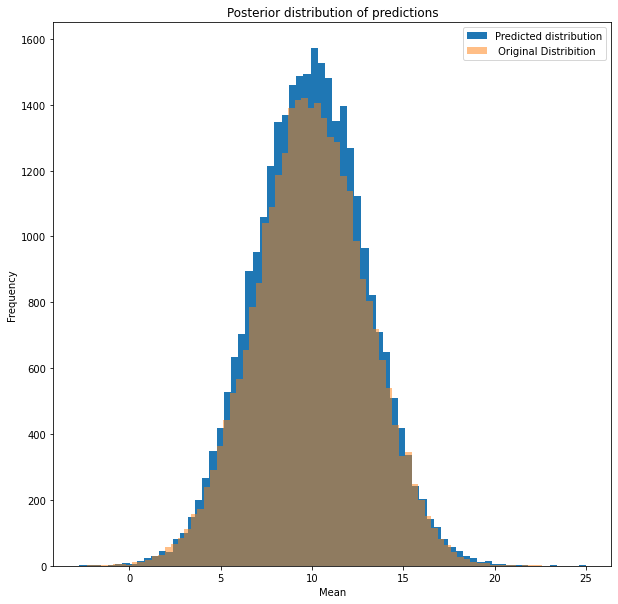

In [144]:
### Prediction 
mu = accepted[show:,0].mean()
sigma = accepted[show:,1].mean()

print(mu,sigma)

model = lambda t,mu,sigma:np.random.normal(mu,sigma,t)
observation_gen = model(population.shape[0], mu,sigma)

fig=plt.figure(figsize=(10,10));
ax = fig.add_subplot(1,1,1)
ax.hist(observation_gen, bins=70, label="Predicted distribution")
ax.hist(population,bins=70,alpha=0.5,label =" Original Distribition")
ax.set_xlabel("Mean")
ax.set_ylabel("Frequency")
ax.set_title("Posterior distribution of predictions")
ax.legend()
print(mu_gen)